In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15.,10)



In [3]:
########################################
# Constants and options
kgC_to_umolsCO2_factor =  (1e3/12.0107)*1e6  #(grams of substance/molar mass) * micromoles conversion
seconds_in_year = 60.*60.*24.*365.
Lc_H2O = 2.501e6


In [69]:
# Directories and Filenames
BASE_DIR='/prj/wetlands_africa/jules/JASMIN/BVOCs/SITE_DATA/'


site='BoscoFontana'
year_str='2012'
#site='AuchencorthMoss'
#year_str='2015'

ipft=0

runids=['Jv4.6_'+site,'Jv4.6_'+site+'_SM','Jv4.6_'+site+'_SM_EMEPemis','Jv4.6_'+site+'_SM_MEGANemis'] 
#runids=['Jv4.6_'+site+'_SM']
        
tstep='tstep'
#tstep='day'
nJULES=len(runids)
JULES_OUTPUT_DIR=BASE_DIR+'jules_runs/output/'+site+'/'
JULES_fnames=[JULES_OUTPUT_DIR+runid+'.'+tstep+'.nc' for runid in runids]

SITE_DIR=BASE_DIR+'data/'
SITE_fname=SITE_DIR+'Bosco_Fontana_Italy_Flux_Data.nc'




In [70]:
# Read Site Data
Svars=['Isoprene_flux','total_Monoterpenes_flux']
Sconvfact=[1e-3*(365.*24.),1e-3*(365.*24.)]
Sinf=nc.Dataset(SITE_fname,'r')
S_Dict={}
for var,cf in zip(Svars,Sconvfact):
    S_Dict[var]=Sinf.variables[var][:].squeeze()*cf

# Round time to closest half an hour
roundtime= np.round(Sinf.variables['time'][:].astype('float64')/1800.)*1800.
S_time=nc.num2date(roundtime,Sinf.variables['time'].units)
del roundtime
Sinf.close()

S_panda=pd.DataFrame(S_Dict,index=S_time)


In [79]:
# Read in JULES data and convert to pandas
Jvars=['isoprene_gb','terpene_gb','lai','tstar_gb','sw_down','tl1','gpp_gb','precip','sthu','fsmc_gb']
Jconvfact=[1e3*(365*24*3600),1e3*(365*24*3600),1,1,1,1,1,1,1,1,1,1]
J_pandas=[]

for Jcnt in range(nJULES):
    print(JULES_fnames[Jcnt])
    Jinf=nc.Dataset(JULES_fnames[Jcnt],'r')

    J_Dict={}
    for var,cf in zip(Jvars,Jconvfact):
        J_Dict[var]=Jinf.variables[var][:].squeeze()*cf
        if len(J_Dict[var].shape)>1:
            J_Dict[var]=J_Dict[var][:,ipft]

    roundtime= np.round(Jinf.variables['time'][:].astype('float64')/1800.)*1800.
    J_time=nc.num2date(roundtime, Jinf.variables['time'].units)
    del roundtime
    Jinf.close()

    J_pandas.append( pd.DataFrame(J_Dict,index=J_time) )



/prj/wetlands_africa/jules/JASMIN/BVOCs/SITE_DATA/jules_runs/output/BoscoFontana/Jv4.6_BoscoFontana.tstep.nc
/prj/wetlands_africa/jules/JASMIN/BVOCs/SITE_DATA/jules_runs/output/BoscoFontana/Jv4.6_BoscoFontana_SM.tstep.nc
/prj/wetlands_africa/jules/JASMIN/BVOCs/SITE_DATA/jules_runs/output/BoscoFontana/Jv4.6_BoscoFontana_SM_EMEPemis.tstep.nc
/prj/wetlands_africa/jules/JASMIN/BVOCs/SITE_DATA/jules_runs/output/BoscoFontana/Jv4.6_BoscoFontana_SM_MEGANemis.tstep.nc


In [80]:
ISO_panda=pd.concat( [panda['isoprene_gb'] for panda in J_pandas],axis=1)  #S_panda['isoprene']] +
ISO_panda.columns=runids   # ['Site']+

TERP_panda=pd.concat( [panda['terpene_gb'] for panda in J_pandas],axis=1)
TERP_panda.columns=runids

LAI_panda=pd.concat( [panda['lai'] for panda in J_pandas],axis=1)
LAI_panda.columns=runids

TSTAR_panda=pd.concat( [panda['tstar_gb'] for panda in J_pandas],axis=1)
TSTAR_panda.columns=runids

(22324320, 22363200)

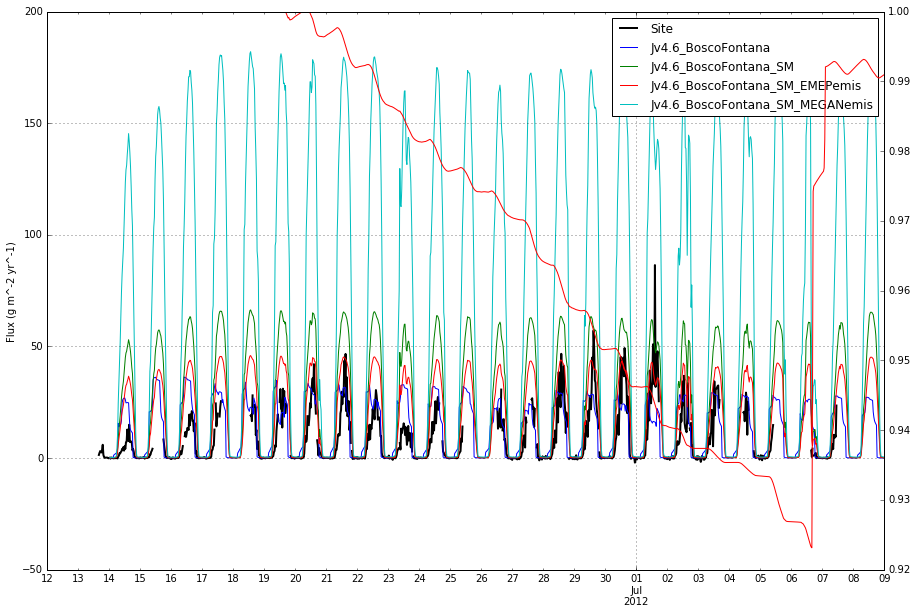

In [81]:
ax=plt.subplot(1,1,1)
S_panda['Isoprene_flux'].plot(c='k',lw=2,grid=True,ax=ax,label='Site')
ISO_panda.plot(ax=ax,grid=True,legend=False)
ax.set_ylabel('Flux (g m^-2 yr^-1)')

plt.legend(loc=1)

ax2=ax.twinx()
J_pandas[1]['fsmc_gb'].plot(ax=ax2,grid=False,legend=False,c='r')

plt.xlim(['2012-06-12','2012-07-09'])



(22314240, 22364640)

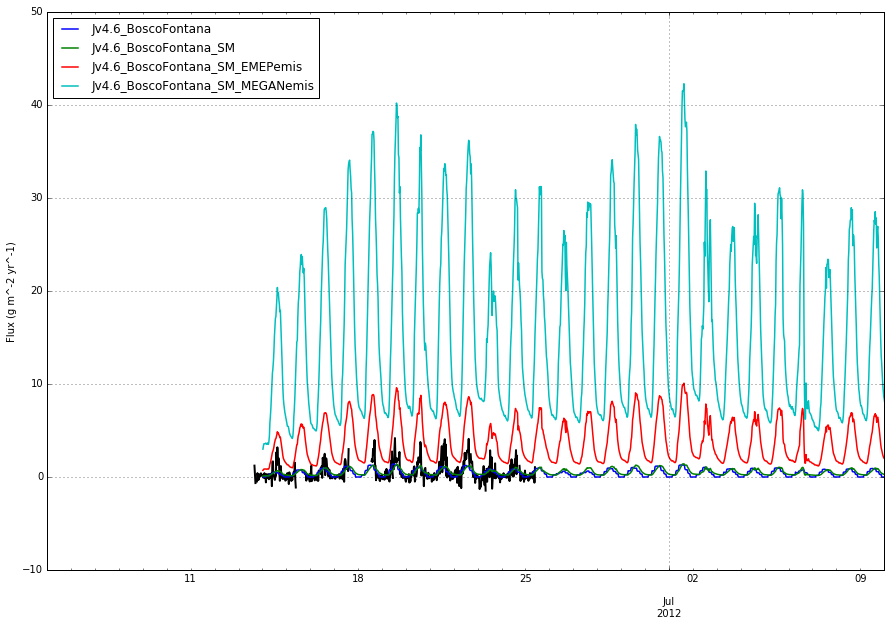

In [44]:
ax=plt.subplot(1,1,1)
S_panda['total_Monoterpenes_flux'].plot(c='k',lw=2,grid=True,ax=ax)
TERP_panda.plot(ax=ax,grid=True,lw=1.5) 
plt.ylabel('Flux (g m^-2 yr^-1)')
plt.xlim(['2012-06-05','2012-07-10'])


In [20]:
print(ISO_panda)

                     Jv4.6_BoscoFontana  Jv4.6_BoscoFontana_SM  \
2012-06-14 00:30:00        0.000000e+00           7.671602e-14   
2012-06-14 01:00:00        0.000000e+00           2.243493e-13   
2012-06-14 01:30:00        0.000000e+00           2.501312e-13   
2012-06-14 02:00:00        0.000000e+00           2.502791e-13   
2012-06-14 02:30:00        0.000000e+00           2.485328e-13   
2012-06-14 03:00:00        0.000000e+00           2.519294e-13   
2012-06-14 03:30:00        8.570329e-12           2.578366e-13   
2012-06-14 04:00:00        1.003809e-11           2.458762e-13   
2012-06-14 04:30:00        1.183633e-11           4.910119e-13   
2012-06-14 05:00:00        1.371991e-11           5.703580e-13   
2012-06-14 05:30:00        1.517092e-11           9.225178e-13   
2012-06-14 06:00:00        1.626389e-11           5.450503e-12   
2012-06-14 06:30:00        3.169719e-11           1.334030e-11   
2012-06-14 07:00:00        1.076927e-10           2.582818e-11   
2012-06-14

(0, 4)

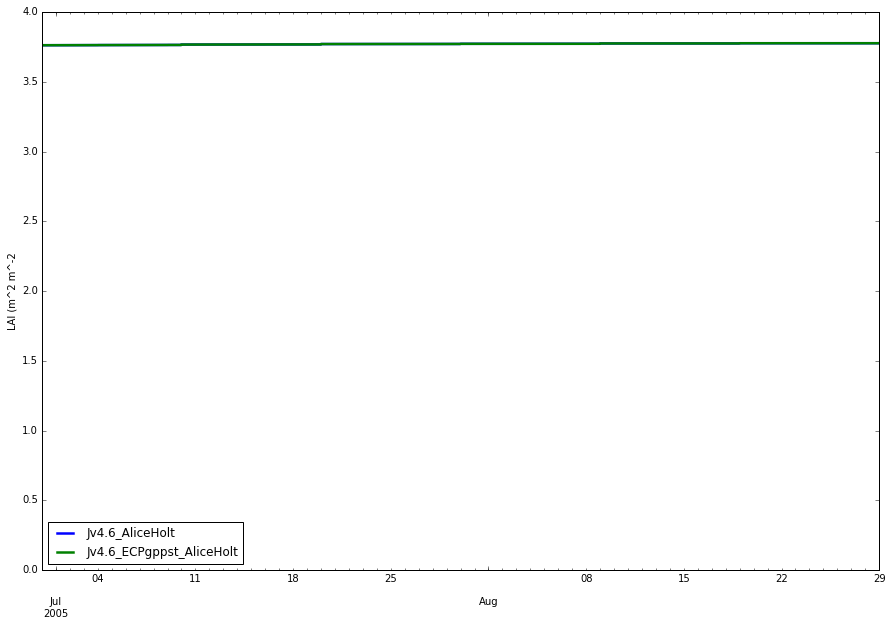

In [28]:
#TERP_panda.plot()
(LAI_panda[180*48:240*48]).plot(lw=2.5)
plt.ylabel('LAI (m^2 m^-2')
plt.ylim([0,4])

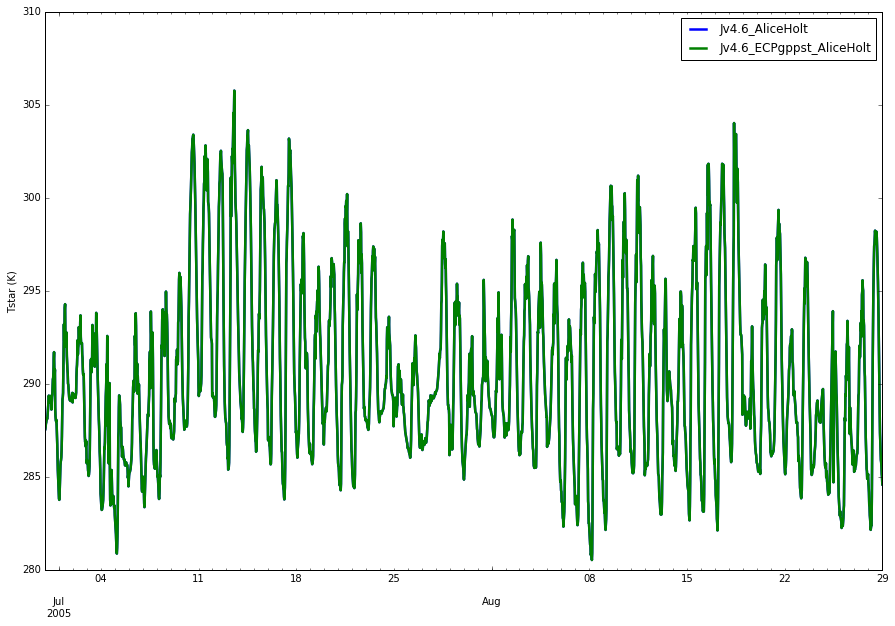

In [29]:
#TERP_panda.plot()
(TSTAR_panda[180*48:240*48]).plot(lw=2.5)
plt.ylabel('Tstar (K)')


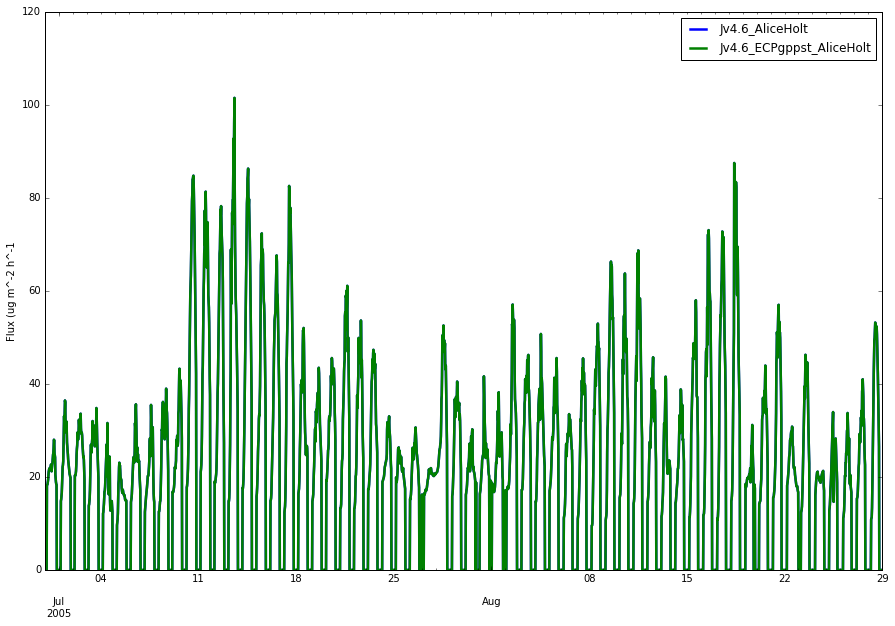

In [31]:

(TERP_panda[180*48:240*48]).plot(lw=2.5)
plt.ylabel('Flux (ug m^-2 h^-1')